# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Maya Hazem  

ID: 55-1360  

Tutorial: T07

---

Name: Hania Ismail

ID: 55-4336

Tutorial: T07

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [730]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [731]:
df.describe()



,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


Here I got basic information for the dataset

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


Here i got info and datatypes of all columns



In [733]:
df.shape

(46578, 15)

Here i got the number of rows and columns in the dataset

In [734]:
df.isnull()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46574,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46575,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46576,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Here I verified that there are no null values

In [735]:
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


I verified once more to make sure there are no null values

In [736]:
df.dtypes

,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,object


Here i once more looked at all the data types alone in an organized manner

In [737]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
46573,False
46574,False
46575,False
46576,False


Here I made sure that there are no exact duplicate rows in the data set

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

**First I will strip all data**: that means i will remove all spaces before and after the data. This helps avoid inconsistency

In [738]:
df['make'].str.strip()

,make
0,Hyundai
1,Toyota
2,Lexus
3,BMW
4,Ford
...,...
46573,Ford
46574,Infiniti
46575,BMW
46576,Toyota


In [739]:
df['model'].str.strip()

,model
0,Sonata
1,4Runner
2,IS 250
3,X5
4,E-Series Van
...,...
46573,Edge
46574,G Sedan
46575,3 Series
46576,Camry


In [740]:
df['trim'].str.strip()

,trim
0,GLS
1,SR5
2,Base
3,4.4i
4,E-250
...,...
46573,SE
46574,G37 Journey
46575,328i
46576,LE


In [741]:
df['body'].str.strip()

,body
0,sedan
1,SUV
2,Sedan
3,SUV
4,E-Series Van
...,...
46573,SUV
46574,g sedan
46575,Sedan
46576,Sedan


In [742]:
df['transmission'].str.strip()

,transmission
0,automatic
1,automatic
2,automatic
3,automatic
4,automatic
...,...
46573,automatic
46574,automatic
46575,automatic
46576,automatic


In [743]:
df['vin'].str.strip()

,vin
0,5npeb4acxdh702805
1,jtezu5jr2e5064567
2,jthbf5c24c5168599
3,5uxfb33562lh33864
4,1ftne2ew0eda31832
...,...
46573,2fmdk4gc2dbc03247
46574,jn1cv6ap9cm623162
46575,wba3a5c56df356614
46576,4t1bf1fk8du254684


In [744]:
df['state'].str.strip()

,state
0,ma
1,fl
2,fl
3,fl
4,wa
...,...
46573,va
46574,ca
46575,tx
46576,ca


In [745]:
df['odometer'].str.strip()

,odometer
0,50404.0mi
1,17846.0mi
2,21122.0mi
3,145303.0mi
4,6714.0mi
...,...
46573,52844.0mi
46574,23185.0mi
46575,45357.0mi
46576,43376.0mi


In [746]:
df['color'].str.strip()

,color
0,black
1,gray
2,silver
3,black
4,white
...,...
46573,—
46574,black
46575,white
46576,black


In [747]:
df['interior'].str.strip()

,interior
0,gray
1,—
2,black
3,black
4,gray
...,...
46573,gray
46574,black
46575,beige
46576,beige


In [748]:
df['seller'].str.strip()

,seller
0,the hertz corporation
1,award auto sales and leasing inc
2,lexus financial services
3,peddle llc
4,u-haul
...,...
46573,wheels exchange llc
46574,nissan infiniti lt
46575,motorcars of south texas
46576,avis rac/san leandro


In [749]:
df['sellingprice'].str.strip()

,sellingprice
0,$10900
1,$29900
2,$24200
3,$3200
4,$22100
...,...
46573,$17000
46574,$21500
46575,$22000
46576,$13800


In [750]:
df['saledate'].str.strip()

,saledate
0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...
46573,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


**Now I will ensure all data is in lowercase to avoid inconsistency**

In [751]:
df['make'].str.lower()

,make
0,hyundai
1,toyota
2,lexus
3,bmw
4,ford
...,...
46573,ford
46574,infiniti
46575,bmw
46576,toyota


In [752]:
df['model'].str.lower()

,model
0,sonata
1,4runner
2,is 250
3,x5
4,e-series van
...,...
46573,edge
46574,g sedan
46575,3 series
46576,camry


In [753]:
df['trim'].str.lower()

,trim
0,gls
1,sr5
2,base
3,4.4i
4,e-250
...,...
46573,se
46574,g37 journey
46575,328i
46576,le


In [754]:
df['body'].str.lower()

,body
0,sedan
1,suv
2,sedan
3,suv
4,e-series van
...,...
46573,suv
46574,g sedan
46575,sedan
46576,sedan


In [755]:
df['transmission'].str.lower()

,transmission
0,automatic
1,automatic
2,automatic
3,automatic
4,automatic
...,...
46573,automatic
46574,automatic
46575,automatic
46576,automatic


In [756]:
df['vin'].str.lower()

,vin
0,5npeb4acxdh702805
1,jtezu5jr2e5064567
2,jthbf5c24c5168599
3,5uxfb33562lh33864
4,1ftne2ew0eda31832
...,...
46573,2fmdk4gc2dbc03247
46574,jn1cv6ap9cm623162
46575,wba3a5c56df356614
46576,4t1bf1fk8du254684


In [757]:
df['state'].str.lower()

,state
0,ma
1,fl
2,fl
3,fl
4,wa
...,...
46573,va
46574,ca
46575,tx
46576,ca


In [758]:
df['color'].str.lower()

,color
0,black
1,gray
2,silver
3,black
4,white
...,...
46573,—
46574,black
46575,white
46576,black


In [759]:
df['interior'].str.lower()

,interior
0,gray
1,—
2,black
3,black
4,gray
...,...
46573,gray
46574,black
46575,beige
46576,beige


In [760]:
df['seller'].str.lower()

,seller
0,the hertz corporation
1,award auto sales and leasing inc
2,lexus financial services
3,peddle llc
4,u-haul
...,...
46573,wheels exchange llc
46574,nissan infiniti lt
46575,motorcars of south texas
46576,avis rac/san leandro


In [761]:
df['saledate'].str.lower()

,saledate
0,tue jun 02 2015 02:30:00 gmt-0700 (pdt)
1,wed feb 18 2015 07:15:00 gmt-0800 (pst)
2,tue jan 20 2015 01:30:00 gmt-0800 (pst)
3,wed mar 04 2015 07:10:00 gmt-0800 (pst)
4,wed feb 18 2015 06:45:00 gmt-0800 (pst)
...,...
46573,wed jan 07 2015 09:30:00 gmt-0800 (pst)
46574,thu jun 18 2015 05:30:00 gmt-0700 (pdt)
46575,wed feb 18 2015 02:00:00 gmt-0800 (pst)
46576,wed jan 14 2015 04:30:00 gmt-0800 (pst)


In [762]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
46573,False
46574,False
46575,False
46576,False


Here i checked that after the changes i made, no duplicates came up

**Next I check the frequency of each unique value in each column now to gain extra insight**

In [763]:
df['year'].value_counts()

,count
year,
2013,8682
2012,8448
2014,6887
2011,4072
2008,2646
2007,2466
2010,2254
2006,2168
2009,1826


In [764]:
df['make'].value_counts()

,count
make,
Ford,7871
Chevrolet,5322
Nissan,4297
Toyota,3474
Dodge,2718
Honda,2403
Hyundai,1801
BMW,1680
Kia,1639


In [765]:
df['model'].value_counts()

,count
model,
Altima,1610
F-150,1179
Fusion,1115
Camry,1081
Escape,1063
...,...
TTS,1
Safari,1
Sierra 1500 Hybrid,1


In [766]:
df['trim'].value_counts()

,count
trim,
Base,4851
SE,3940
LX,1912
Limited,1506
LT,1501
...,...
Formula,1
318i,1
Turbo PZEV,1


In [767]:
df['body'].value_counts()

,count
body,
Sedan,17171
SUV,9942
sedan,3686
suv,1994
Hatchback,1869
...,...
CTS Wagon,1
granturismo convertible,1
promaster cargo van,1


In [768]:
df['transmission'].value_counts()

,count
transmission,
automatic,44928
manual,1650


In [769]:
df['vin'].value_counts()

,count
vin,
5npeb4acxdh702805,1
4t4bf1fk7cr200717,1
4t1bf1fk5eu756747,1
1c4rjfcg0cc176579,1
1ftrx14w68kd18180,1
...,...
jn8az18u19w020683,1
jn1cv6ar9bm411071,1
jn8af5mv2dt206502,1


In [770]:
df['state'].value_counts()

,count
state,
fl,7451
ca,6440
tx,4056
ga,3008
nj,2302
pa,2287
il,2082
oh,1984
tn,1891


In [771]:
df['condition'].value_counts()

,count
condition,
1.9,3651
3.5,2239
3.7,2227
4.3,2135
4.2,2130
4.4,2112
3.6,2058
4.1,1971
2.9,1715


In [772]:
df['odometer'].value_counts()

,count
odometer,
1.0mi,86
30600.0mi,6
34864.0mi,6
36265.0mi,5
10120.0mi,5
...,...
143487.0mi,1
43249.0mi,1
47075.0mi,1


In [773]:
df['color'].value_counts()

,count
color,
black,9156
white,8693
gray,7046
silver,6982
blue,4244
red,3685
—,2246
gold,948
green,891


In [774]:
df['interior'].value_counts()

,count
interior,
black,20734
gray,15020
beige,4917
tan,3777
—,988
brown,694
blue,101
red,92
silver,88


In [775]:
df['seller'].value_counts()

,count
seller,
"ford motor credit company,llc",1733
the hertz corporation,1561
nissan-infiniti lt,1514
santander consumer,1425
avis corporation,1158
...,...
hg motor company llc,1
orlando mini,1
braddock motors llc,1


In [776]:
df['sellingprice'].value_counts()

,count
sellingprice,
$12000,397
$11000,374
$14000,353
$10000,345
$13000,342
...,...
$52600,1
$48600,1
$63500,1


In [777]:
df['saledate'].value_counts()

,count
saledate,
Tue Feb 10 2015 01:30:00 GMT-0800 (PST),490
Tue Jan 27 2015 01:30:00 GMT-0800 (PST),477
Tue Jan 20 2015 01:30:00 GMT-0800 (PST),471
Tue Mar 03 2015 01:30:00 GMT-0800 (PST),425
Tue Feb 03 2015 01:30:00 GMT-0800 (PST),421
...,...
Tue Feb 24 2015 00:00:00 GMT-0800 (PST),1
Mon Feb 23 2015 00:31:00 GMT-0800 (PST),1
Fri Mar 06 2015 05:00:00 GMT-0800 (PST),1


**Now I noticed that some data contains a dash that means there is a missing value, to avoid that i will change the dashes to the word "unspecified" for more clarity and to be regarded as an actual value in itself**

In [778]:
df['make'] = df['make'].str.replace('—', 'unspecified')

In [779]:
df['model'] = df['model'].str.replace('—', 'unspecified')

In [780]:
df['trim'] = df['trim'].str.replace('—', 'unspecified')

In [781]:
df['body'] = df['body'].str.replace('—', 'unspecified')

In [782]:
df['transmission'] = df['transmission'].str.replace('—', 'unspecified')

In [783]:
df['vin'] = df['vin'].str.replace('—', 'unspecified')

In [784]:
df['state'] = df['state'].str.replace('—', 'unspecified')

In [785]:
df['odometer'] = df['odometer'].str.replace('—', 'unspecified')

In [786]:
df['color'] = df['color'].str.replace('—', 'unspecified')

In [787]:
df['interior'] = df['interior'].str.replace('—', 'unspecified')

In [788]:
df['seller'] = df['seller'].str.replace('—', 'unspecified')

In [789]:
df['sellingprice'] = df['sellingprice'].str.replace('—', 'unspecified')

In [790]:
df['saledate'] = df['saledate'].str.replace('—', 'unspecified')

**Now I will turn some objects into float to help ease the data manipulation and usage**

In [791]:
df['sellingprice'] = df['sellingprice'].astype(str).str.replace('$', '')

In [792]:
df['sellingprice'] = df['sellingprice'].astype(float)


In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  float64
 14  saledate      46578 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 5.3+ MB


Here I verified that the selling price is a float

In [794]:
df['odometer'] = df['odometer'].astype(str).str.replace('mi', '')

In [795]:
df['odometer'] = df['odometer'].astype(float)


In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  float64
 14  saledate      46578 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 5.3+ MB


Here I verified that odometer has become a float

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

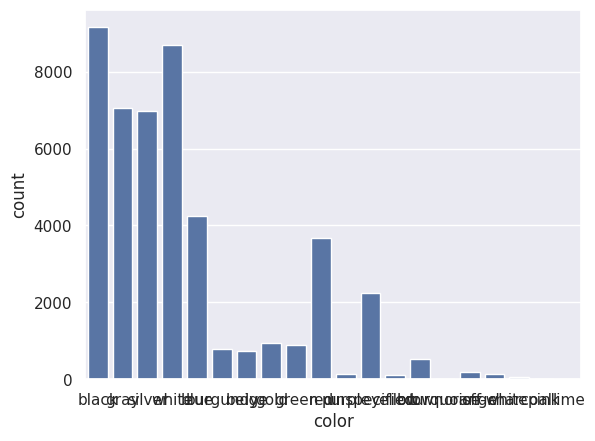

In [797]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

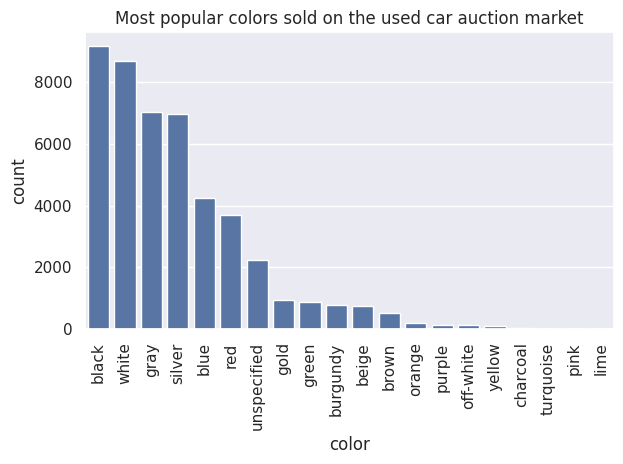

In [798]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

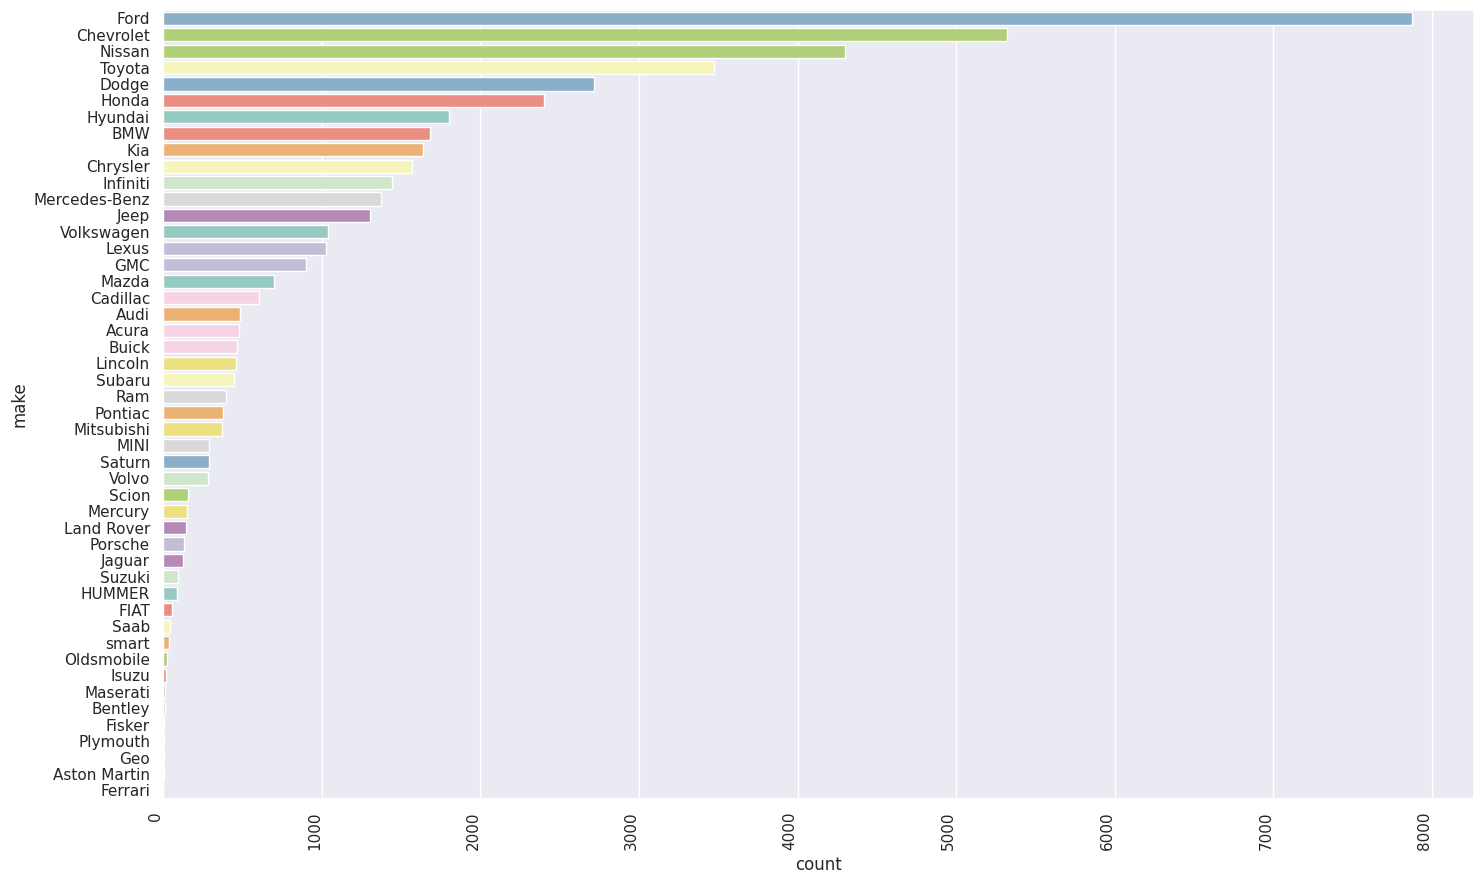

In [799]:
import seaborn as sns
import matplotlib.pyplot as plt
make_order = df['make'].value_counts().index
custom_colors = sns.color_palette("Set3", n_colors=len(make_order))
plt.figure(figsize=(15, 9))
sns.countplot(y='make', data=df, hue='make', order=make_order, palette=custom_colors, legend=False)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Answer for Q1**: Based on the chart, the top five most popular car brands in order are

1. Ford
2. Chevrolet
3. Nissan
4. Toyota
5. Dodge

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

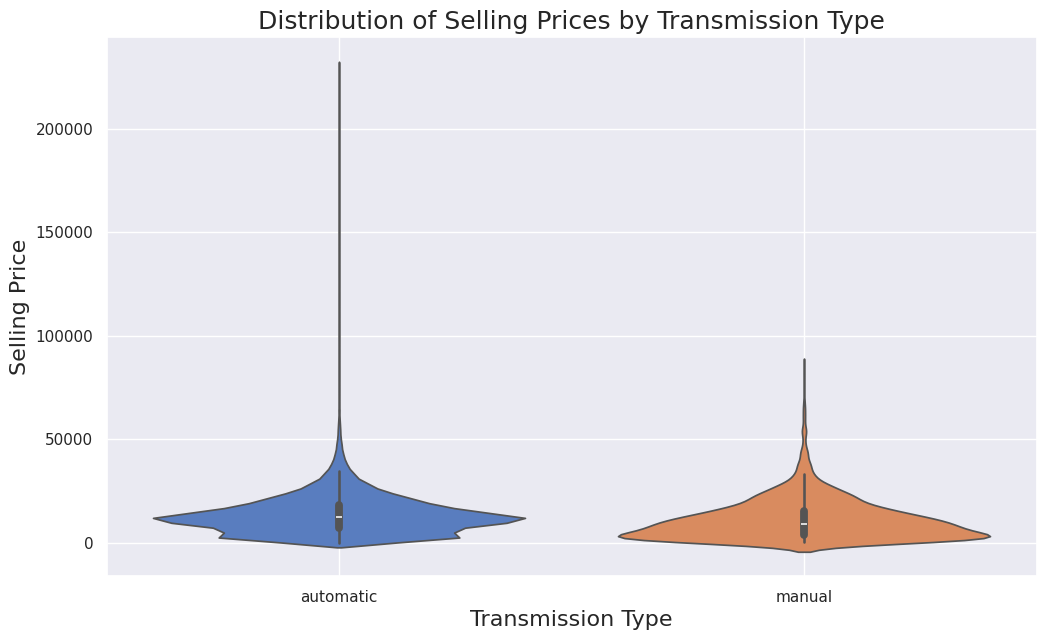

In [800]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.violinplot(x='transmission', y='sellingprice', data=df, hue='transmission', palette='muted', legend=False)
plt.title('Distribution of Selling Prices by Transmission Type', fontsize=18)
plt.xlabel('Transmission Type', fontsize=16)
plt.ylabel('Selling Price', fontsize=16)
plt.grid(True)
plt.show()


**Answer for Q2**: Based on the violin chart, the distribution for automatic cars shows a higher concentration of higher prices compared to the manual cars, indicating that the typical selling price for automatic vehicles is greater than manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

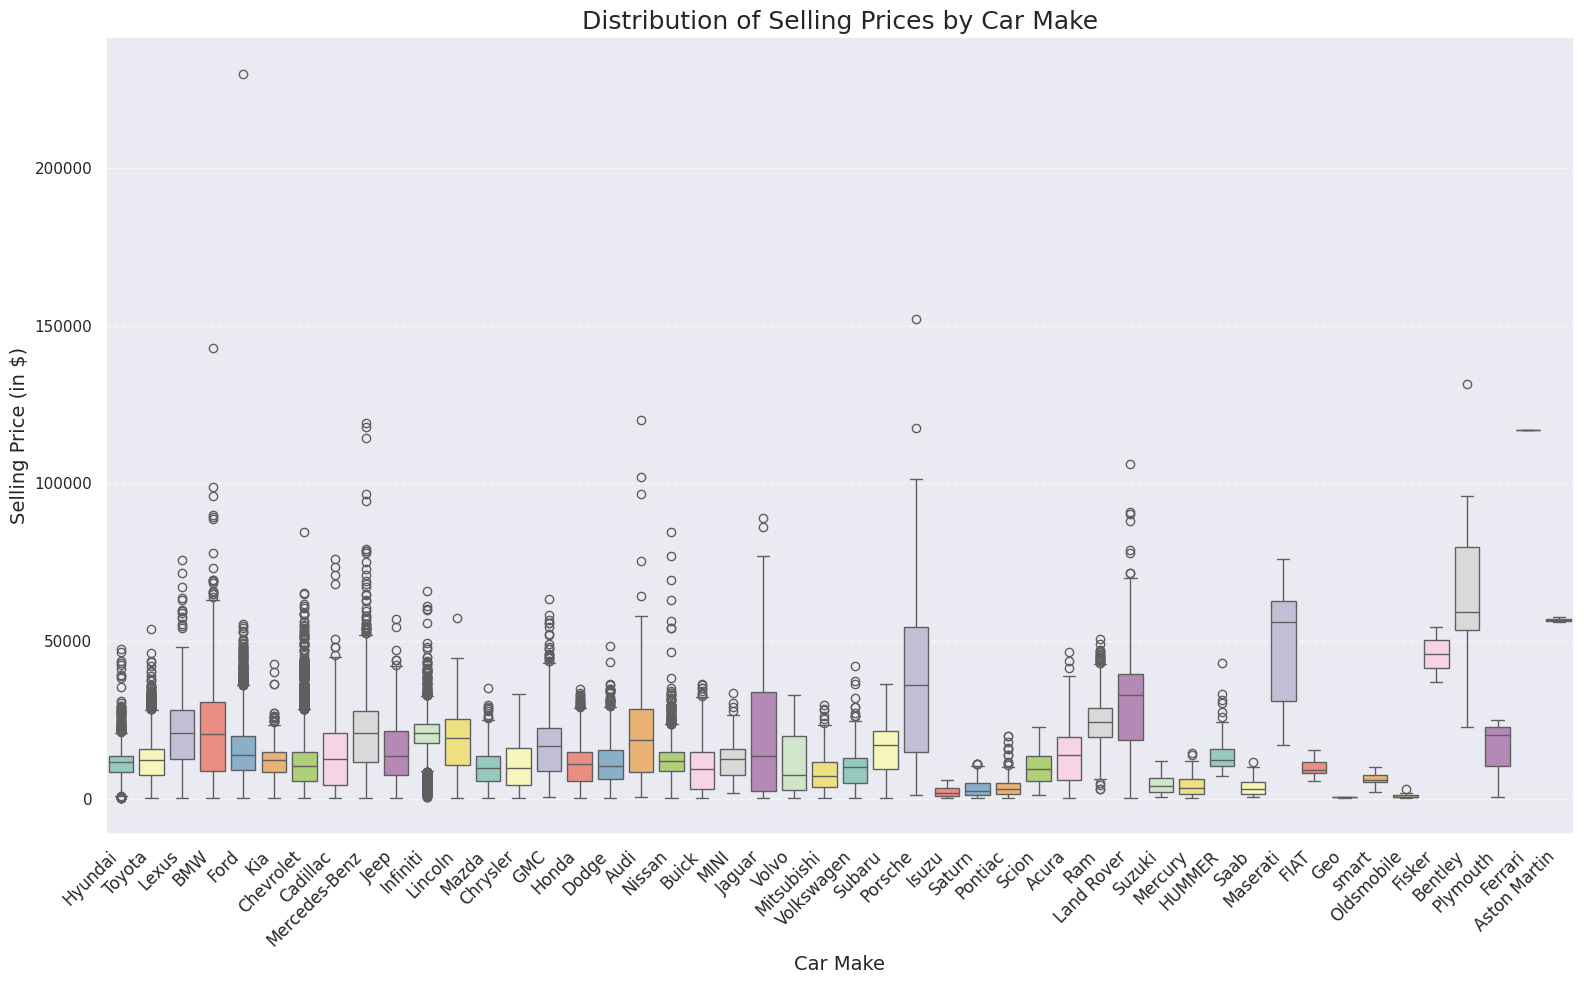

In [801]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['sellingprice'] = df['sellingprice'].replace({'\$': ''}, regex=True).astype(float)
plt.figure(figsize=(16, 10))
sns.boxplot(x='make', y='sellingprice', data=df, palette='Set3', hue='make', legend=False)
plt.title('Distribution of Selling Prices by Car Make', fontsize=18)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Selling Price (in $)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Answer for Q3**: From the boxplot, we can analyze the distribution of selling prices for different car makes.

Car Makes with the Widest Distribution of Selling Price:
1. Porsche
2. Ferrari

These makes show the largest distribution in selling prices, as shown from the height of their boxes and whiskers (the vertical range).

Most Expensive Car Makes:
1. Aston Martin
2. Ferrari

This is due to these brands having the highest median selling prices, shown by the position of the boxes towards the top of the chart.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

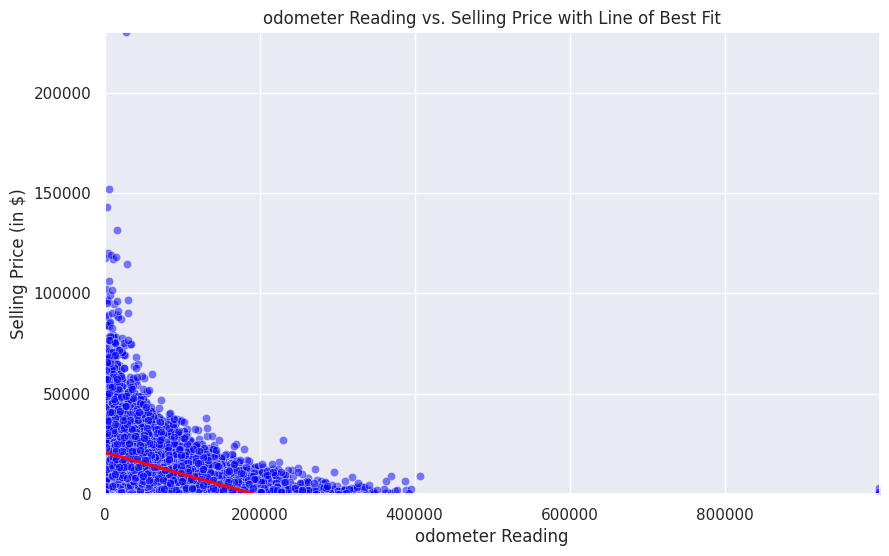

In [802]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', color='blue', alpha=0.5)
sns.regplot(data=df, x='odometer', y='sellingprice', scatter=False, color='red')
plt.title('odometer Reading vs. Selling Price with Line of Best Fit')
plt.xlabel('odometer Reading')
plt.ylabel('Selling Price (in $)')
plt.xlim(0, df['odometer'].max())
plt.ylim(0, df['sellingprice'].max())
plt.show()



**Answer for Q4**: There is a negative correlation between the selling price and the odometer reading of cars, as seen by the chart and line of best fit.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

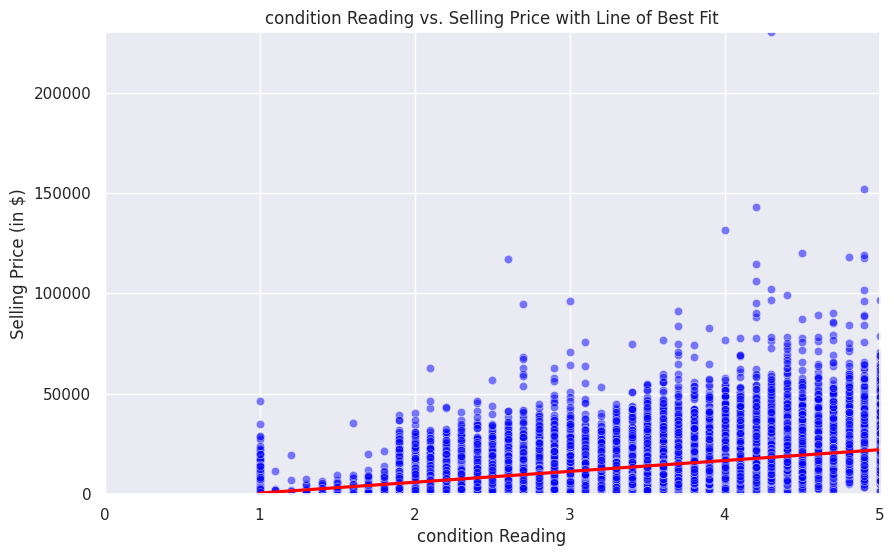

In [803]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='condition', y='sellingprice', color='blue', alpha=0.5)
sns.regplot(data=df, x='condition', y='sellingprice', scatter=False, color='red')
plt.title('condition Reading vs. Selling Price with Line of Best Fit')
plt.xlabel('condition Reading')
plt.ylabel('Selling Price (in $)')
plt.xlim(0, df['condition'].max())
plt.ylim(0, df['sellingprice'].max())
plt.show()



**Answer for Q5**: There is a positive correlation between the selling price and the condition of cars, as seen by the chart and line of best fit.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

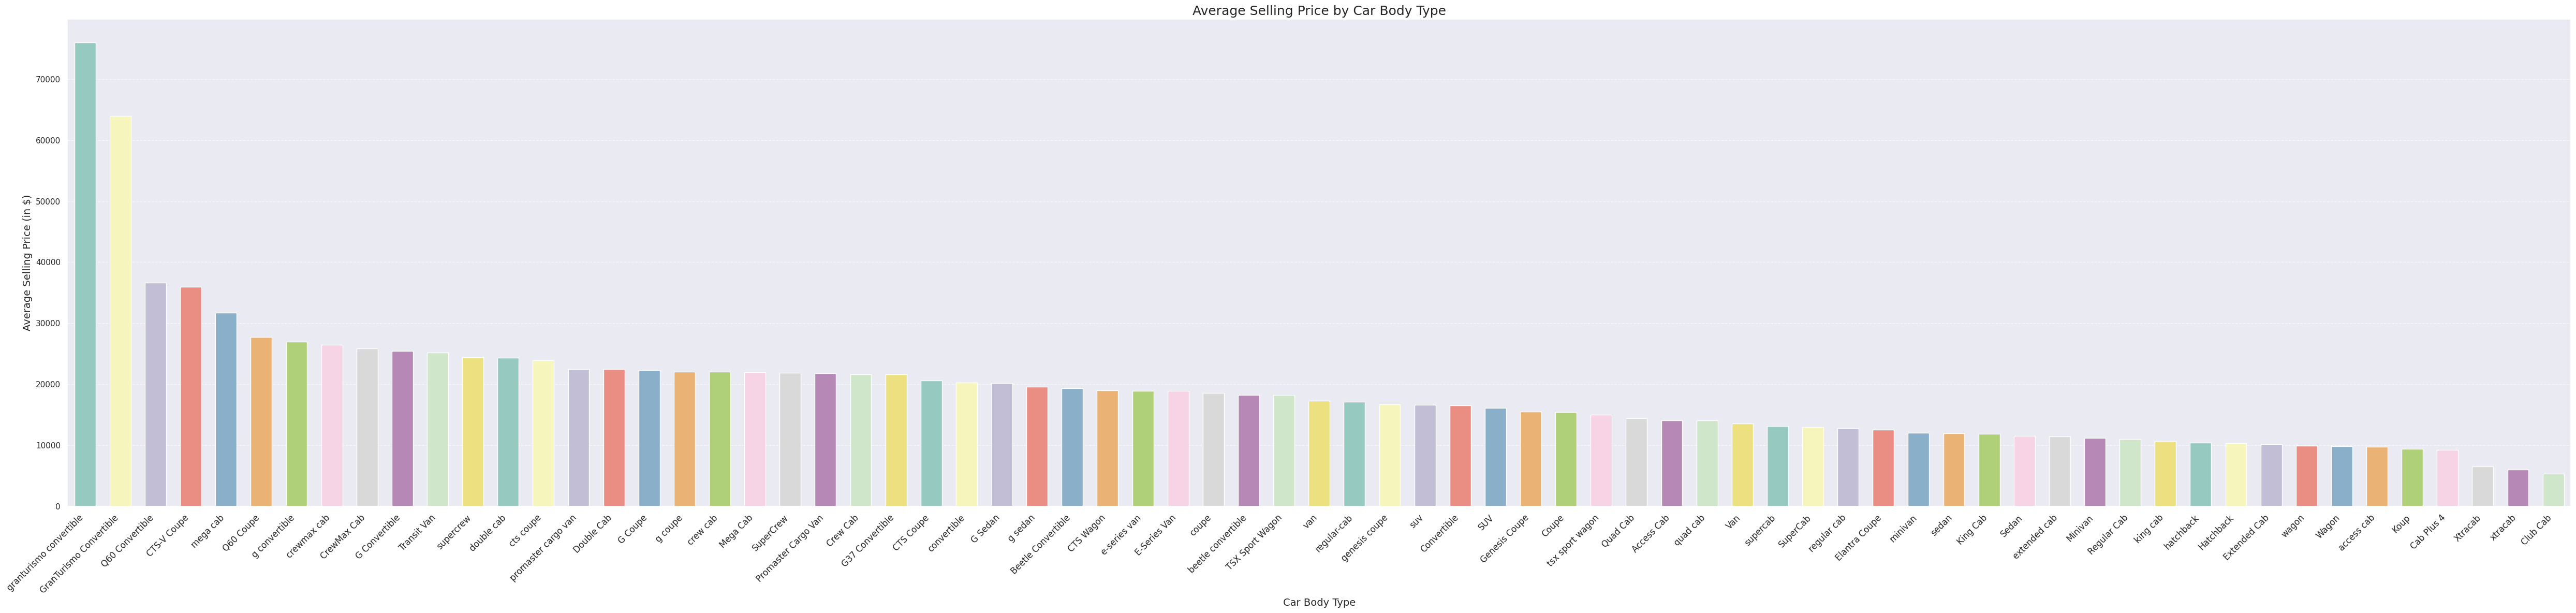

In [804]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
average_prices = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)
average_prices = average_prices.reset_index()
plt.figure(figsize=(50, 12))
sns.barplot(x='body', y='sellingprice', data=average_prices, hue='body', palette='Set3', width=0.6, legend=False)
plt.title('Average Selling Price by Car Body Type', fontsize=18)
plt.xlabel('Car Body Type', fontsize=14)
plt.ylabel('Average Selling Price (in $)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()






In [805]:
average_prices.loc[average_prices['sellingprice'].idxmax()]

,0
body,granturismo convertible
sellingprice,76000.0


In [806]:
average_prices.loc[average_prices['sellingprice'].idxmin()]

,70
body,Club Cab
sellingprice,5350.0


**Answer for Q6**: Based on the bar chart, the average selling price differs significantly across car body types.

Most Expensive Car Body Type:
GranTurismo Convertible

Least Expensive Car Body Types:
Club Cab

The order of the selling prices by descending order is shown on the chart displayed from left to right.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

now i will apply data normalization

In [807]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df_clean = df.copy()
numeric_columns = ['odometer', 'condition']
scaler = MinMaxScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])
df_clean[numeric_columns].head()

,odometer,condition
0,0.050403,0.725
1,0.017845,0.975
2,0.021121,0.775
3,0.145302,0.225
4,0.006713,0.975


In [808]:
import pandas as pd
from sklearn.model_selection import train_test_split
df_clean.drop(columns=['vin', 'seller', 'saledate', 'state'], inplace=True)
categorical_columns = ['make', 'model', 'trim', 'body', 'color', 'interior', 'transmission']
df_encoded = pd.get_dummies(data=df_clean, columns=categorical_columns, drop_first=True, dtype='int8')
df_encoded.head()


,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_unspecified,interior_white,interior_yellow,transmission_manual
0,2013,0.725,0.050403,10900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,0.975,0.017845,29900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2012,0.775,0.021121,24200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,0.225,0.145302,3200.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,0.975,0.006713,22100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here I dropped the columns that are insignificant to the model to focus more on the vital data. I also changed all categorical columns into numerical to help ease data manipulation.

In [ ]:
import pandas as pd
data = {
    'body': ['Sedan', 'Coupe', 'Convertible', 'SUV', 'Hatchback',
             'Minivan', 'Wagon', 'Pickup Truck', 'Crew Cab',
             'Double Cab', 'Regular Cab', 'SUV', 'Sports Car']
}
df = pd.DataFrame(data)
newbody = {
    'Sedan': 'Sedan',
    'Coupe': 'Coupe',
    'Convertible': 'Convertible',
    'Hatchback': 'Hatchback',
    'SUV': 'SUV',
    'Minivan': 'Minivan',
    'Wagon': 'Wagon',
    'Pickup Truck': 'Pickup Truck',
    'Crew Cab': 'Pickup Truck',
    'Double Cab': 'Pickup Truck',
    'Regular Cab': 'Pickup Truck',
    'Sports Car': 'Other'
}
df['body'] = df['body'].replace(newbody)

In [ ]:
df['body'].value_counts()

This minimized the categories in the body to simplify and aid the model

## Modelling

**_Apply the linear regression model below._**

In [810]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_encoded.drop('sellingprice', axis=1)
y = df_encoded['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(X.shape[1])]
columns = ['y-intersect'] + list(X.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))
parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.014765e+06
1,theta_1,year,1.013715e+03
2,theta_2,condition,5.109961e+03
3,theta_3,odometer,-4.352709e+04
4,theta_4,make_Aston Martin,1.889225e+04
...,...,...,...
1895,theta_1895,interior_tan,-1.263062e+02
1896,theta_1896,interior_unspecified,4.462881e+02
1897,theta_1897,interior_white,-9.783776e+02
1898,theta_1898,interior_yellow,0.000000e+00


Here I trained my model based on the sellingprice as it is the most crucial part of dependent data. I tested 40 samples.

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [811]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = lin_reg.predict(X_test)

In [812]:
r2_score(y_test, y_pred)

0.8663351138041114

The score of 0.86 indicates that the model explains about 86% of the variance in the selling price, which is quite a good score for the dataset.


In [813]:
mean_squared_error(y_test, y_pred)

12400115.383424746

An MSE of value 12,400,115.38 indicates that, on average, the square of the errors between the model's predictions and the actual values is approximately 12,400,115.38.


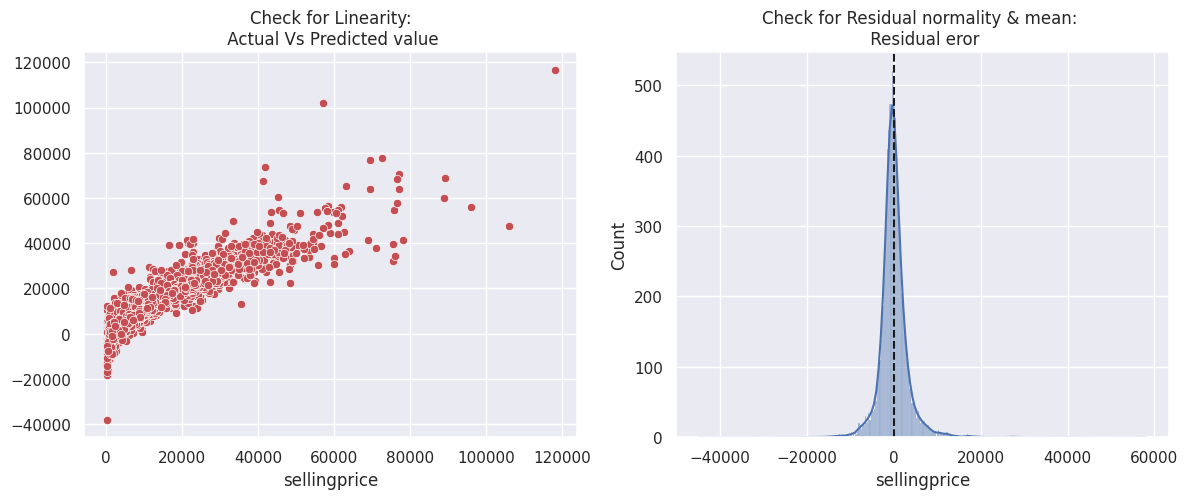

In [814]:
y_pred = lin_reg.predict(X_test)
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Actual vs Predicted Values

Checks for linearity between actual and predicted selling prices.
The points are mostly clustered around a linear trend, indicating a good fit of the model. However, there is some spread, especially at lower predicted values, suggesting that the model may struggle to accurately predict lower selling prices. The general upward trend implies that as the predicted value increases, the actual selling price also tends to increase, confirming a positive correlation.


Right Chart: Residuals Distribution

Checks for the normality of residuals and their mean. The histogram is right-skewed, indicating that there are some large positive residuals, meaning the model sometimes overestimates selling prices. The dashed line at zero indicates the mean of the residuals, which appears to be close to zero, suggesting that on average, the model does not systematically overestimate or underestimate selling prices. The sharp peak around zero indicates that most residuals are concentrated near the mean, which is a good sign for model validity, but the skewness suggests that there might be some outliers affecting performance.


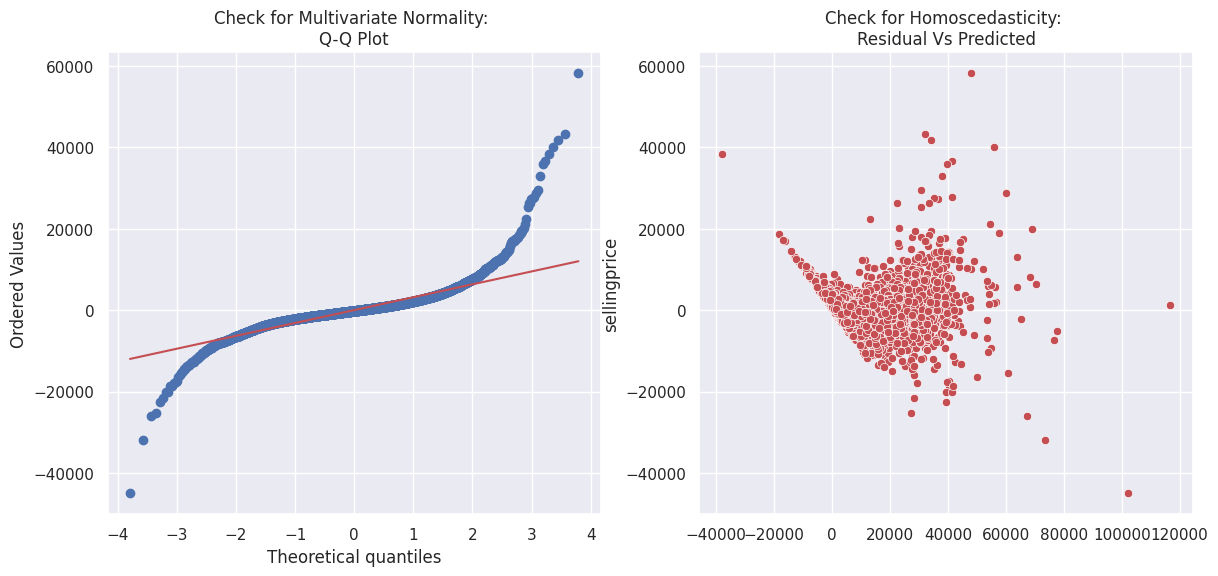

In [815]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

**Q-Q Plot**

This chart compares the ordered values of the residuals to a normal distribution. The red line represents the expected line if the residuals were normally distributed. Deviations from this line, especially in the tails (left and right), suggest that the residuals may not be normally distributed.


**Residual vs. Predicted**

 This scatter plot examines homoscedasticity, which is the assumption that residuals have constant variance. If the residuals are randomly dispersed around zero with no clear pattern, this suggests that homoscedasticity holds. A funnel shape or patterns indicate potential issues.



**assumptions**
 1. Normality: dependent variable is normally distributed

 2. Independence: orthogonal independent variables are Not highly correlated with each other

 3. Linearity: linear relationships among variables is present

 Assumptions are met

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?





**Answer**: The model has a very good score and accuracy. It detects variance very well and is aproppriate to be used for car dealerships to get price estimates as based on the r2 score and mse.